#### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


### Exploratory Data Analysis Steps....

* Univarate Analysis - Single Variable Analysis (Num: Histograms/Distplot| Cat: Countplot or Frequency Plot)

* Bivariate Analysis/Multivariate Analysis 
    * (Num vs Target(Num): Scatterplot & also Heatmap(Correlation Plot), 
    * Cat vs Num(Target): **Boxplot**/ViolinPlot/Barplot, 
    * Cat vs Cat (Target): Crosstab/Frequency - Countplot/Heatmap

* Missing Values & Imputation - We are going to deal with the missing values...
     * If it is a Numerical Var: Use Mean/Median Imputation
     *  Categorical Var - Frequency....
     
* Outlier Analysis & Treatment

* **Feature Engineering**

* Encoding and Scaling...Standard Scaler or Min Max Scaler for Scaling and for Categorical Encoding - One Hot Encoding, Label Encoding, Target Encoding and Frequency Encoding...


In [1]:
# Import the required libraries...

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [123]:
train = pd.read_csv("~/Downloads/train_v9rqX0R.csv")
test = pd.read_csv("~/Downloads/test_AbJTz2l.csv")

In [3]:
# Preview the Dataset...
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Univariate Analysis

In [4]:
# Combined the Dataset
combined = pd.concat([train, test], ignore_index = True)

In [5]:
train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 12))

In [6]:
# # Find all the Numerical Variables...
combined.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

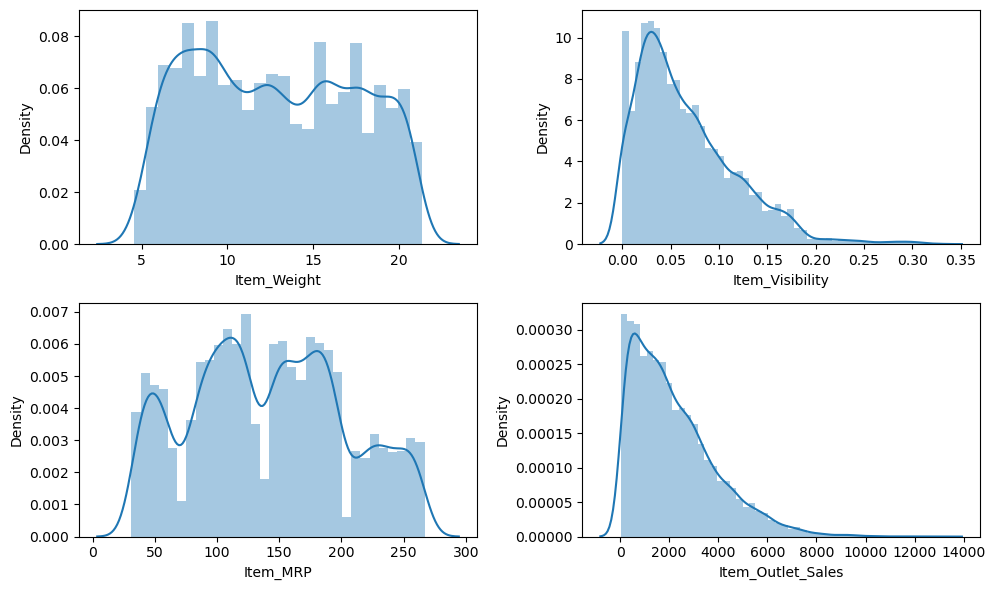

In [7]:
num_cols = ['Item_Weight', 'Item_Visibility', 
            'Item_MRP','Item_Outlet_Sales']

nrows = 2 # Number of rows in the plot
ncols = 2 # No of Columns for the plot
iterator = 1 # Plot Iterator...


plt.figure(figsize = (10, 6))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

<Axes: >

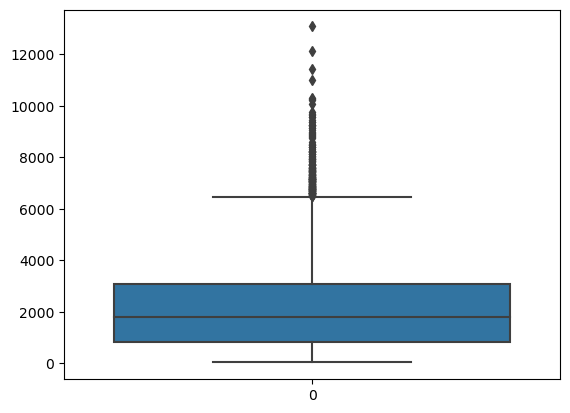

In [8]:
# Lets Analyse the Target

sns.boxplot(combined.Item_Outlet_Sales)

In [9]:
# Cat Vars...

combined.select_dtypes(include = np.object).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

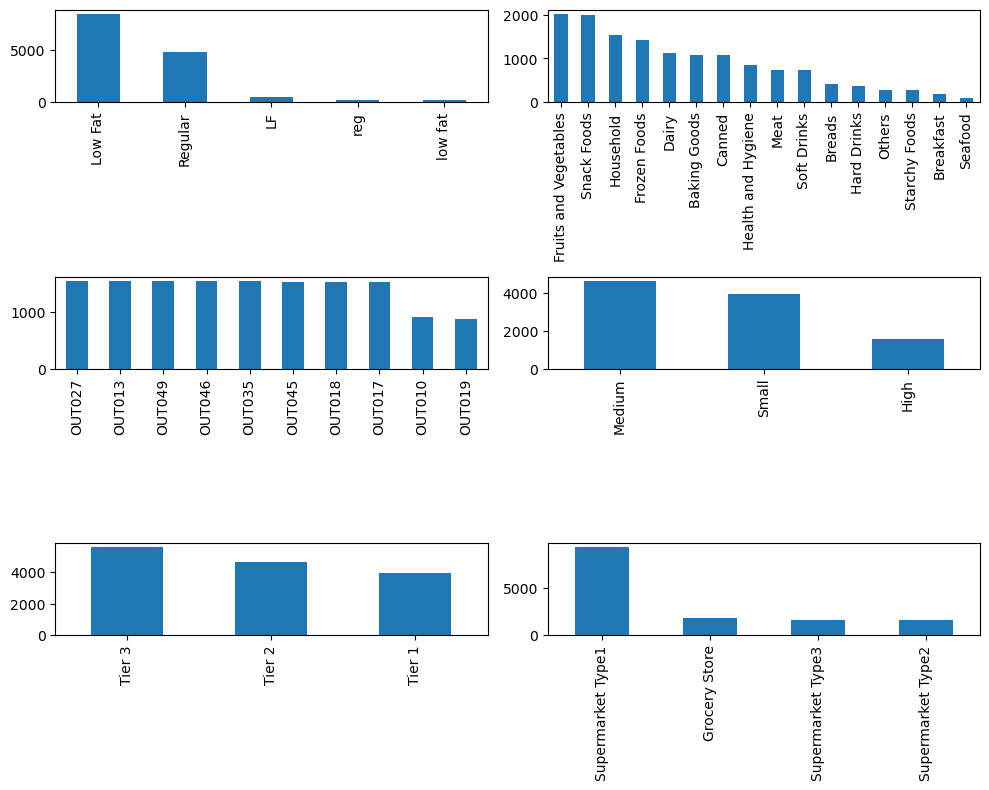

In [10]:
cat_cols = ['Item_Fat_Content', 
            'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (10, 8))
for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    combined.loc[:, i].value_counts().plot(kind = "bar")
    repeater+=1
    
plt.tight_layout()
plt.show()

### Univariate Analysis Inference

* Most of the Items that are sold are **Low Fat** Items
* The Top 5 Selling Items in the Business are **Fruits & Veggies**, **Snack Foods**, **Household**, **Frozen** and **Dairy**.

* Most Seen Outlet Type is **OUT027** and the Less Frequent Outlets in the Business are **OUT010 & OUT019**.

* Most of the Outlets built by the company are **Medium** Size Outlets
* Most of the Outlets are in **Tier3** Cities followed **Tier-2** and then **Tier-1**

* Most of the Outlet Themes are **Supermarket Type 1**

In [11]:
#combined.Outlet_Identifier.value_counts()

combined.loc[combined.Outlet_Identifier=="OUT019", "Outlet_Type"].unique()

array(['Grocery Store'], dtype=object)

### Bivariate Analysis

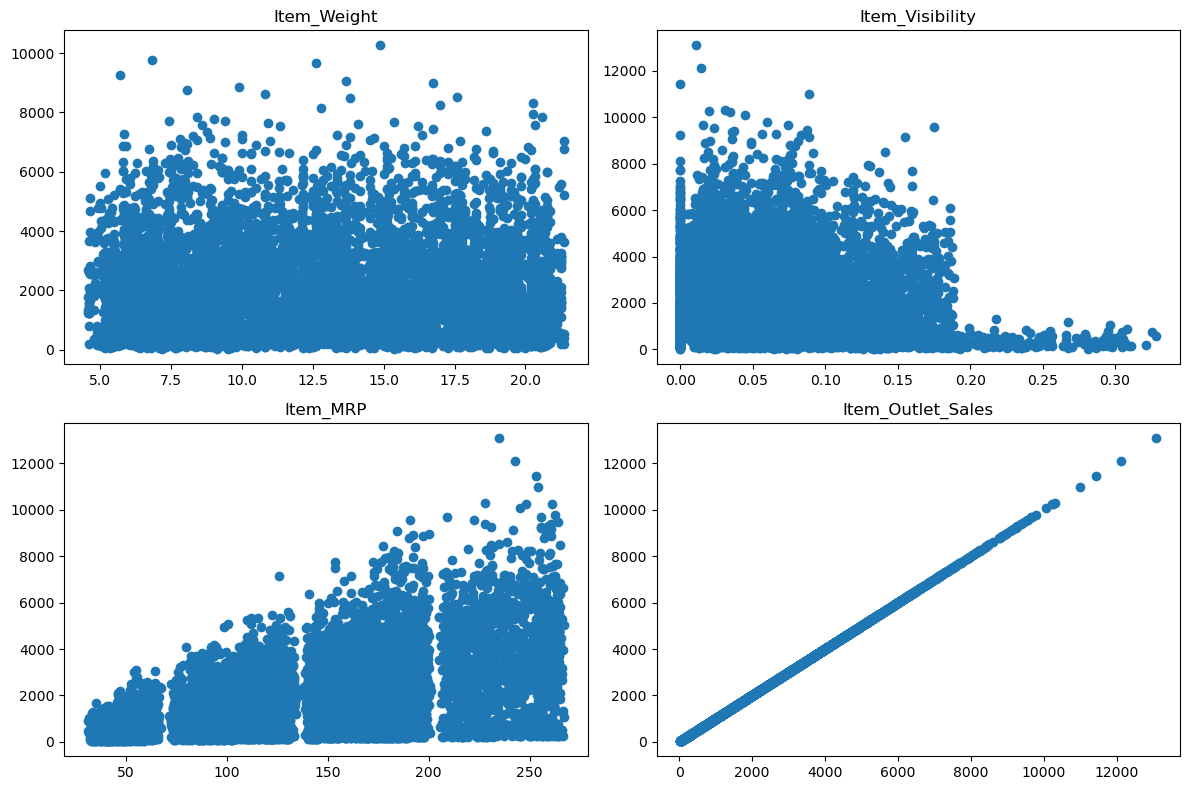

In [12]:
# Num vs Num

nrows = 2
ncols = 2
iterator = 1

plt.figure(figsize = (12, 8))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    plt.scatter(combined.loc[:, i], 
                    combined.Item_Outlet_Sales)
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [13]:
combined.select_dtypes(include=np.object).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
# Fix the Item Fat Content

combined.Item_Fat_Content.replace(to_replace = ["low fat", "LF","reg"],
                                 value = ["Low Fat", "Low Fat", "Regular"],
                                 inplace = True)

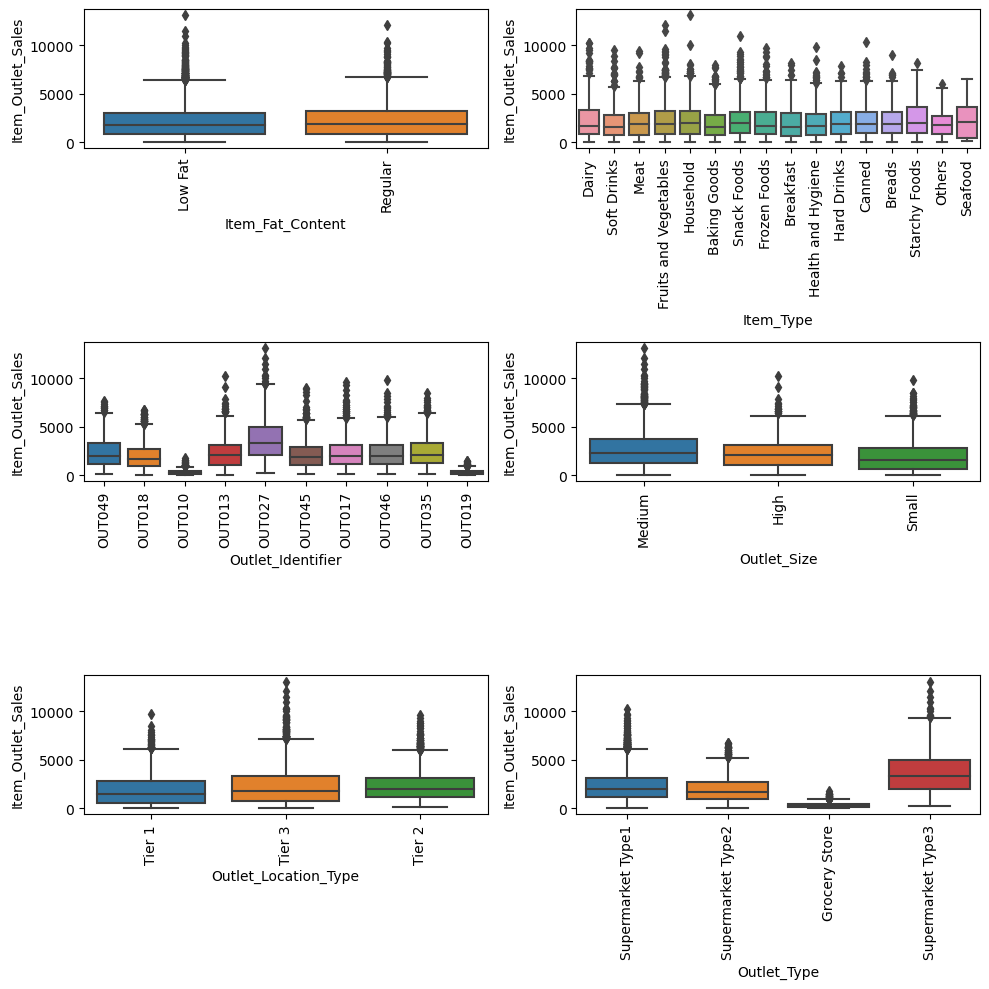

In [15]:
# Cat vs Num

nrows = 3
ncols = 2
rep = 1

plt.figure(figsize = (10, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, rep)
    sns.boxplot(data = combined, 
                x = i, y = "Item_Outlet_Sales")
    plt.xticks(rotation = 90)
    rep+=1
    
plt.tight_layout()
plt.show()

In [16]:
combined.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
12299,NCT05,10.895,Low Fat,0.020984,Health and Hygiene,255.9672,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN


### Revision

1. What is the Average Sales
2. What is the 95% values of Sales.
3. Identify the Product that sells the Most
4. Find the Middle most observation for the MRP
5. Compare the Mean and Trimmed Mean of Sales
6. What percentage of Dairy Items are in the Data.
7. Which Product as the highest variation in Sales
8. What is the Range of Middle 50% of ITEM MRP
9. Are there any variables that should be excluded from the Model Building
10. Find Percentage of Variation in Item Weight for each Product
11. Is there any variable that is Normally Distributed
12. Identify the most visible Outlet Type for the Business
13. Do we have negatively skewed feature/Column in the Dataset
14. Find the Kurtosis of all the variables.
15. Identify the Presence of Extreme Values in the Dataset
16. Is there any effect of MRP on the Price?
17. Transform Item Outlet Sales such that the Mean is 0 and Standard Deviation is 1 
18. Transform the Sales in such a way that the range is 1
19. Check Skewness of Item Outlet Sales and find out how to reduce the skewness

In [17]:
# What is the Average Sales
print("Mean Sales: ", combined.Item_Outlet_Sales.mean())

# What is the 95% values of Sales.
print("95% Sales Values:", combined.Item_Outlet_Sales.quantile(0.95))

Mean Sales:  2181.288913575032
95% Sales Values: 5522.811


In [18]:
# Identify the Product that sells the Most

combined.Item_Type.mode()[0]

'Fruits and Vegetables'

In [19]:
# Find the Middle most observation for the MRP

combined.Item_MRP.median()

142.247

In [20]:
# Compare the Mean and Trimmed Mean of Sales
print("mean:", combined.Item_Outlet_Sales.mean())

import scipy.stats as stats # Statistical Library....
trimmed_mean = stats.trim_mean(train.Item_Outlet_Sales, 
                               proportiontocut=0.01)

print("Trimmed Mean",trimmed_mean)

# What percentage of Dairy Items are in the Data.
print(combined.loc[combined.Item_Type=="Dairy"]\
      .shape[0]/len(combined))

mean: 2181.288913575032
Trimmed Mean 2138.3762353405964
0.07997747113489158


In [21]:
# Which Product as the highest variation in Sales
combined.groupby("Item_Type")["Item_Outlet_Sales"].std()

# What is the Range of Middle 50% of ITEM MRP
q3 = combined.Item_MRP.quantile(0.75)
q1 = combined.Item_MRP.quantile(0.25)
print("IQR RANGE: ", q3-q1)

# Are there any variables that should be excluded from the 
# Model Building


IQR RANGE:  91.84360000000001


In [22]:
# # Find Percentage of Variation in Item Weight for each Product

combined.groupby("Item_Type")["Item_Weight"].var()

Item_Type
Baking Goods             22.514129
Breads                   21.456343
Breakfast                27.220044
Canned                   21.394154
Dairy                    21.740994
Frozen Foods             20.364915
Fruits and Vegetables    20.865426
Hard Drinks              17.891346
Health and Hygiene       20.711948
Household                24.776365
Meat                     21.626444
Others                   16.956985
Seafood                  27.808086
Snack Foods              20.678003
Soft Drinks              19.431578
Starchy Foods            17.905810
Name: Item_Weight, dtype: float64

In [23]:
for i in combined.Item_Type.unique():
    mean_=  combined.loc[combined.Item_Type==i, "Item_Weight"].mean()
    std_ = combined.loc[combined.Item_Type==i, "Item_Weight"].std()
    print("CV for", i,std_/mean_)

CV for Dairy 0.3522131559667399
CV for Soft Drinks 0.3739373755063592
CV for Meat 0.3642790439914629
CV for Fruits and Vegetables 0.3461973859651611
CV for Household 0.37318900890557627
CV for Baking Goods 0.386543702138451
CV for Snack Foods 0.35344333082714774
CV for Frozen Foods 0.3590288949024649
CV for Breakfast 0.3958751726877383
CV for Health and Hygiene 0.34551534644867565
CV for Hard Drinks 0.36538886491627415
CV for Canned 0.37480312491089957
CV for Breads 0.4153469410839404
CV for Starchy Foods 0.3097804421422045
CV for Others 0.2959160504964309
CV for Seafood 0.41326207322300035


### Scaling

* Standard Scaler
Standard Scaler is one of the popular techniques used for Scaling in the Data Science Fraternity. It involves calculating the mean & std of all the numerical columns and then using **Z score to convert the data into Standard Normal Distribution where the Mean of all the Columns is equal to 0 and Standard Deviation is 1.**

### Normalization

* It is another technique used to scale the data in such a way where the Min of each Column is Equal to 0 and the Max of each column is equal to 1.

* Since, it takes the range in denominator, thus, it is very much influenced by the presence of the Outliers in the data. Therefore Min Max Scaler is not a very effective technique in scaling the data.

Note: Standard Scaler is quite versatile in nature as it can handle the presence of Outliers well. 

Note2: However, in the presence of outliers in the data, one must apply **ROBUST SCALER** to scale the data.

In [24]:
train.loc[:, num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler() # Machine Instance 

In [26]:
# Scale the Data....
# sc = (xi-mean)/sd

# .fit() will only learn the mean & std
# .fit_transform() will not only learn the mean & std but also convert

scaled = sc.fit_transform(pd.DataFrame(combined.Item_MRP))

# Note: sc takes data in 2D format and hence, 
# I need to supply the DataFrame

In [27]:
print(pd.DataFrame(scaled, columns=["ZScore"]).mean())
print(pd.DataFrame(scaled, columns=["ZScore"]).std())

ZScore   -1.386919e-16
dtype: float64
ZScore    1.000035
dtype: float64


In [28]:
# Apply Standard Scaler on the Whole Data

sc = StandardScaler()

scaled = sc.fit_transform(combined.loc[:, num_cols])

In [29]:
pd.DataFrame(scaled, columns = num_cols).describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,1.176500e+04,1.420400e+04,1.420400e+04,8.523000e+03
mean,-1.449471e-17,-5.602703e-17,-1.386919e-16,1.635049e-16
std,1.000043e+00,1.000035e+00,1.000035e+00,1.000059e+00
min,-1.770704e+00,-1.281712e+00,-1.767181e+00,-1.258790e+00
25%,-8.775982e-01,-7.563065e-01,-7.569166e-01,-7.894057e-01
50%,-4.145348e-02,-2.318886e-01,2.000528e-02,-2.267687e-01
75%,8.505775e-01,5.457876e-01,7.224096e-01,5.391513e-01
max,1.839335e+00,5.100167e+00,2.027606e+00,6.391045e+00


In [30]:
# Min Max Scaler

mmax = MinMaxScaler()

In [31]:
pd.DataFrame(mmax.fit_transform(combined.loc[:, num_cols]), 
            columns = num_cols).min()

Item_Weight          0.0
Item_Visibility      0.0
Item_MRP             0.0
Item_Outlet_Sales    0.0
dtype: float64

In [32]:
def minmax(df, xi):
    return((df[xi]-min(df[xi]))/(max(df[xi])-min(df[xi])))

In [33]:
minmax(combined, "Item_MRP").describe()

count    14204.000000
mean         0.465686
std          0.263529
min          0.000000
25%          0.266224
50%          0.470958
75%          0.656055
max          1.000000
Name: Item_MRP, dtype: float64

#### Transformation

**Why Transform**

* The Purpose of Transformation is to reduce the **SKEWNESS** in the data.

* Most of the Statistical Models have an assumption about the data that it should be Normally Distributed/Gaussian Curve.

* We can apply some of the transformation techniques to reduce the skewness in the data

* Those Techniques are as follows:

    * Log Transformation
    * SQRT Transformation
    * Cube Root
    * Reciprocal
    * Box-Cox
    * Yeo-JohnSon

1.1775306028542796


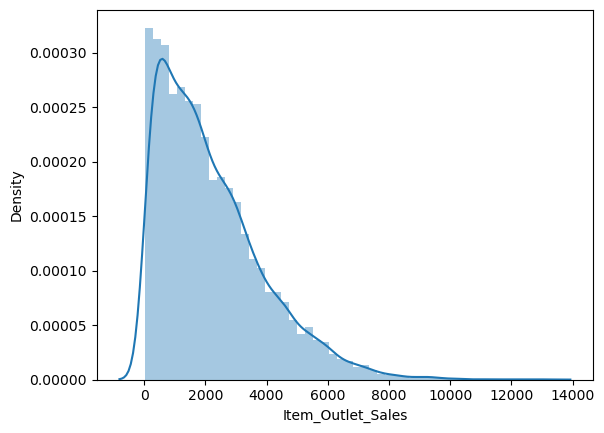

In [34]:
# Without Transformation
sns.distplot(train.Item_Outlet_Sales)
print(train.Item_Outlet_Sales.skew())

-0.887753343209305


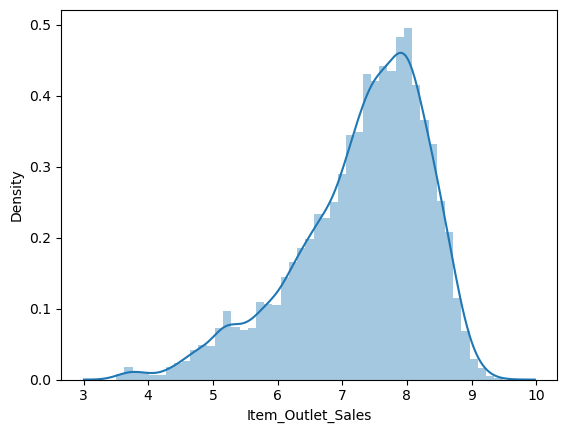

In [35]:
# Apply Log Transformation
sns.distplot(np.log(train.Item_Outlet_Sales))
print(np.log(train.Item_Outlet_Sales).skew())

1.0851408216698326


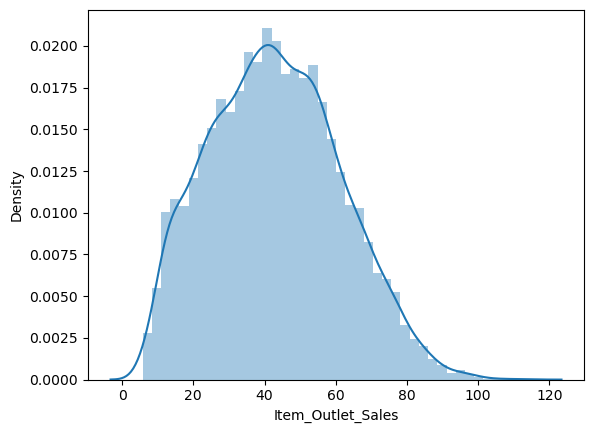

In [36]:
# Apply SQRT Transformation
sns.distplot(np.sqrt(train.Item_Outlet_Sales))
print(np.sqrt(train.Item_Outlet_Sales.skew()))

-0.10250699736722735


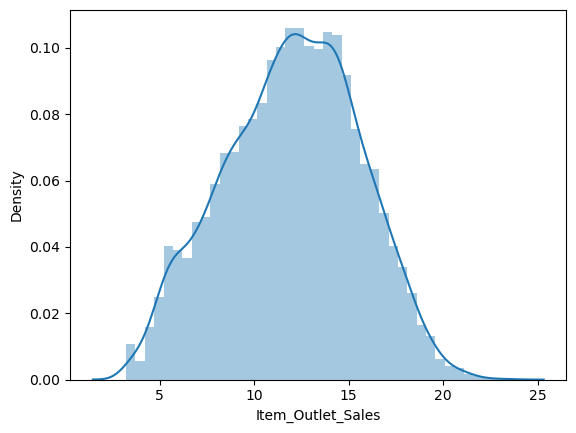

In [37]:
# Apply CUBEROOT Transformation
sns.distplot(np.cbrt(train.Item_Outlet_Sales))
print(np.cbrt(train.Item_Outlet_Sales).skew())

5.679237323396784


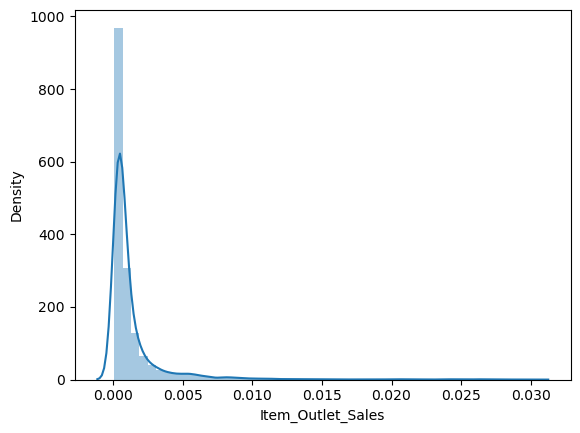

In [38]:
# Apply Recirpocal Transformation
sns.distplot(np.reciprocal(train.Item_Outlet_Sales))
print(np.reciprocal(train.Item_Outlet_Sales).skew())

### Box Cox Transformation & Yeo-Johnson Transformation

* BoxCox Transformation works on transforming the Positive Values(greater than 0) only as the function entails usage of Log Transformation as per the formula if the function encounters 0 in the data.

* Where as the YeoJohnson Function can work on any number be it 0, -ve or +ve number. In totality, the Yeo Johnson is more flexible and a versatile transformation bet on the data..

-0.0749649223767276


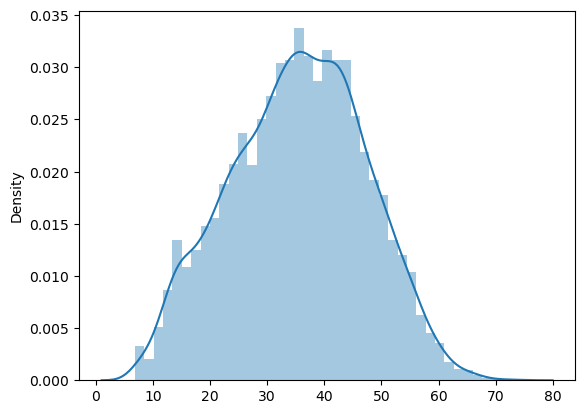

In [39]:
# use scipy.stats 

sns.distplot(stats.boxcox(train.Item_Outlet_Sales)[0])
print(stats.skew(stats.boxcox(train.Item_Outlet_Sales)[0]))

-0.07477744470274916


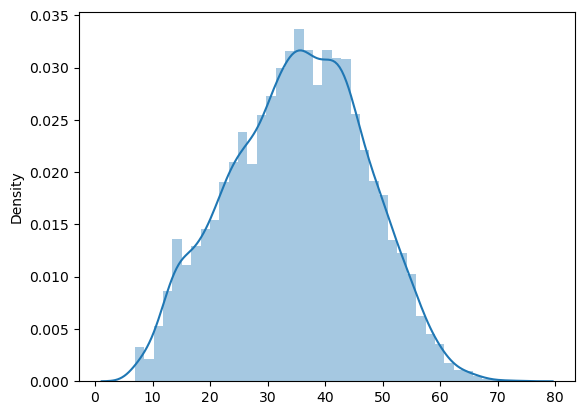

In [40]:
# use Yeo Johnson

sns.distplot(stats.yeojohnson(train.Item_Outlet_Sales)[0])
print(stats.skew(stats.yeojohnson(train.Item_Outlet_Sales)[0]))

In [41]:
stats.yeojohnson([23, 54, 98, 0, -134])

(array([ 31.07413761,  80.56195565, 157.18079953,   0.        ,
        -81.46815947]),
 1.1280463185584948)

### Missing Values

* Rule says if 95% or more data is missing in the column, then it is best to drop that column.   

Note: This is a theoretical rule. The point is to find the pattern in the data in such a way that you can handle most of the missing values in the data....

* Now, basis discussion, we see that prima facie, we can consider the mode of the categorical variable & Median in Numerical Variable to impute the missing value. 

* However, this approach might not work because we have not explore the pattern from the rest of the columns/features.

* Therefore, we need to do the pattern exploration on priority to find out the closest possible pattern for the missing value and then impute it accordingly,

* In the event of the pattern not being available or unable to mine the pattern, its always good to build the model and deal with the missing values accordingly.

In [42]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [43]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [44]:
# Outlet size is missing
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [45]:
# Find the Mode of Outlet Type
combined.Outlet_Size.mode()[0]

'Medium'

In [46]:
combined.loc[combined.Outlet_Identifier=="OUT019", ].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [47]:
# Imputting the 'Small' in OUT010
combined.loc[(combined.Outlet_Identifier=="OUT010")&\
             (combined.Outlet_Size.isnull()), "Outlet_Size"] = "Small"

In [48]:
# Missing Outlets are 45 & 17
# 45 ~ S1
# 17 ~ S1
combined.loc[combined.Outlet_Identifier=="OUT045", 
             "Outlet_Type"].unique()

array(['Supermarket Type1'], dtype=object)

In [49]:
# Lets find out the Outlet Size where the Type is S1
combined.loc[combined.Outlet_Type=="Supermarket Type1", 
             "Outlet_Size"].mode()[0]

'Small'

In [50]:
combined.groupby(["Outlet_Identifier", "Outlet_Type"])\
["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT010             Grocery Store      Small           925
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: Outlet_Size, dtype: int64

In [51]:
# Imputting Small in Remaining Data

combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Size"] = "Small"

<Axes: >

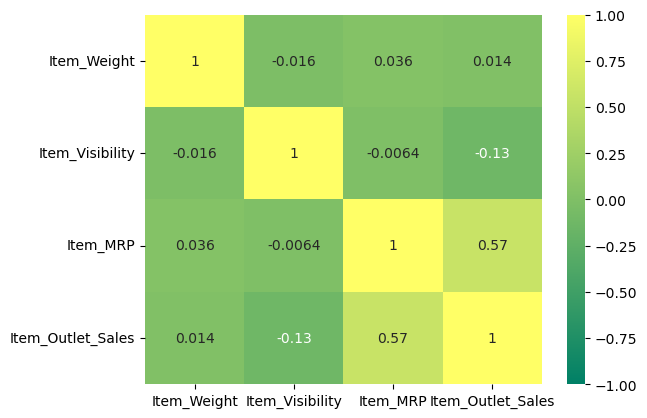

In [52]:
sns.heatmap(combined.loc[:, num_cols].corr(), annot = True,
            cmap = "summer",vmax=1,vmin=-1)

In [53]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
combined.loc[combined.Item_Identifier=="DRC01", "Item_Weight"]

1        5.92
2272     5.92
2927      NaN
5029     5.92
5077     5.92
5218     5.92
9453     5.92
10588    5.92
12787    5.92
Name: Item_Weight, dtype: float64

In [55]:
# Item Weight and Sales...

combined.Item_Weight.isnull().sum()

2439

In [56]:
combined.loc[combined.Item_Weight.isnull()].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [57]:
combined.loc[7, "Item_Weight"] =combined.loc\
[combined.Item_Identifier=="FDP10", "Item_Weight"].median()

In [58]:
# Lambda - very straight forward approach

combined["Item_Weight"] = combined.groupby("Item_Identifier")\
["Item_Weight"].apply(lambda x:x.fillna(x.median()))

In [59]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

In [60]:
combined["Item_Visibility"] = combined.groupby("Item_Identifier")\
["Item_Visibility"].apply(lambda x:x.replace(to_replace = 0, 
                                             value = x.median()))

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

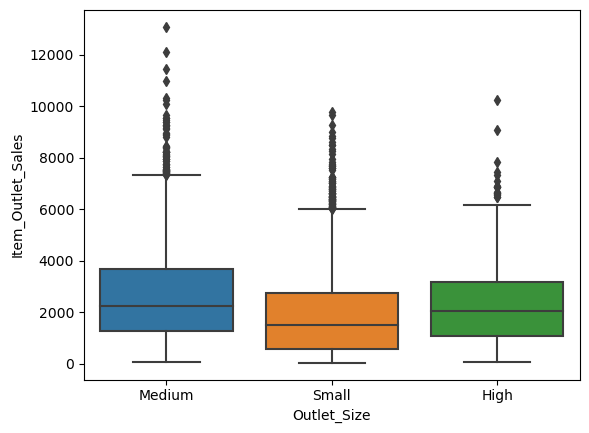

In [61]:
sns.boxplot(data = combined, x = "Outlet_Size", 
           y = "Item_Outlet_Sales")

### Feature Engineering

* Bin the Item Identifier and Item Type

Note: The Purpose of creating new features and binning is to make sure that the machine is able to capture the pattern well. This concept is known as Generalization.

In [62]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [63]:
# Extract the First Two Letters from Item ID
ids = []

for i in combined.Item_Identifier:
    ids.append(i[:2])

In [64]:
combined["Item_IDS"] = pd.Series(ids)

#### Steps that I Follow

* Univariate
* Biv
* Feature Engineering - Most Important Step..
* Missing Values
* Outlier Analysis and Removal - This is the step where I split the data in train and test back again.
* Scaling and Transformation
* Categorical Encoding

**Why I split the Data in Train and Test Before Outliers??**
* You remove the Outliers from training data only and not from test.
* Train - that dataset on which the model will get trained
* Test - is that dataset on which the model will **predict**.


<Axes: xlabel='Item_IDS', ylabel='Item_Outlet_Sales'>

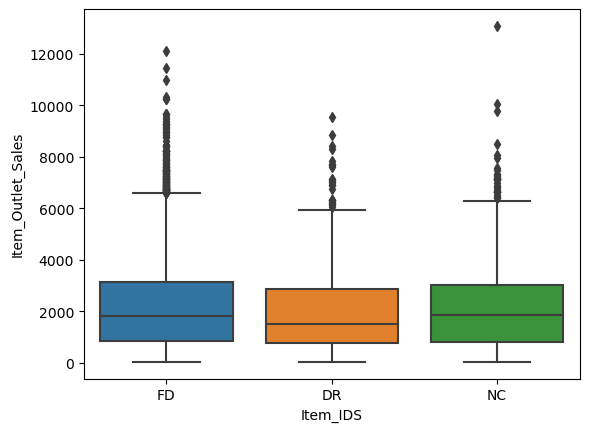

In [65]:
# Pattern of Item ID vs Sales
sns.boxplot(data = combined, x='Item_IDS', y = 'Item_Outlet_Sales')

In [66]:
# Where it is NC, we put Non Edible in Item Fat Content

combined.loc[combined.Item_IDS=="NC", "Item_Fat_Content"]="Non_Edible"


<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

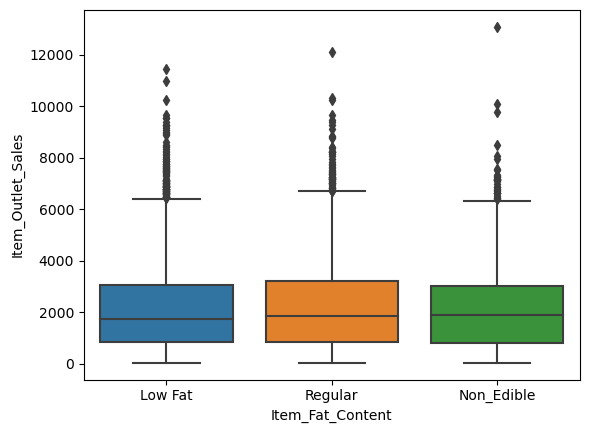

In [67]:
sns.boxplot(data = combined, x='Item_Fat_Content', 
            y = 'Item_Outlet_Sales')

In [68]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Non_Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [69]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [70]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

non_perishables = ['Soft Drinks', 'Baking Goods', 
                   'Snack Foods', 'Frozen Foods','Hard Drinks', 'Canned']

In [71]:
def perish(x):
    if x in perishables:
        return("Perishables")
    elif x in non_perishables:
        return("Non_Perishables")
    else:
        return("Non_Eateries")

In [72]:
combined["Item_Type"] = combined.Item_Type.apply(perish)

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

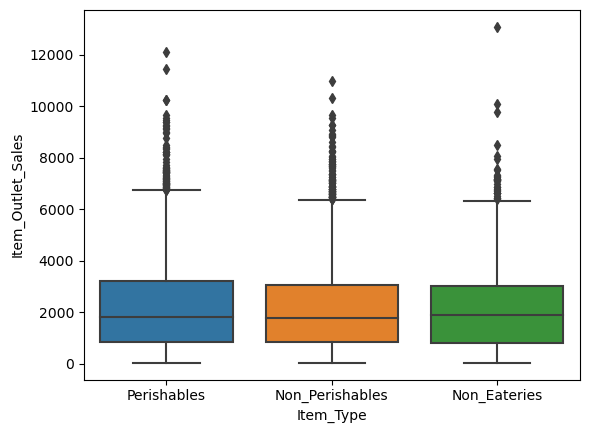

In [73]:
sns.boxplot(data = combined, x='Item_Type', 
            y = 'Item_Outlet_Sales')

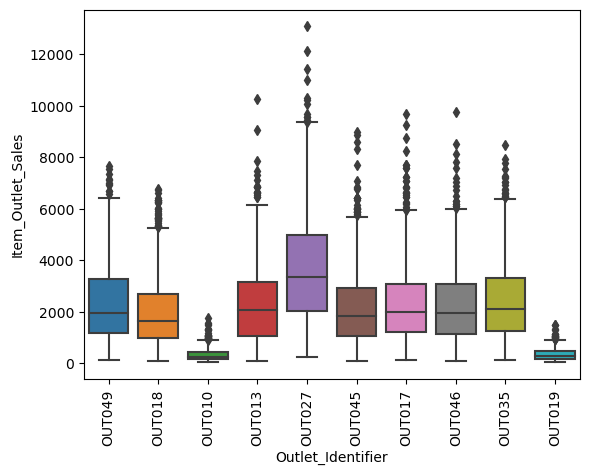

In [74]:
# Outlet Identifier
sns.boxplot(data = combined, x='Outlet_Identifier', 
            y = 'Item_Outlet_Sales')
plt.xticks(rotation = 90)
plt.show()

# Top Performers, Avg Performers, Bad Performers


In [75]:
#combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

In [76]:
# Top - 27, 13 and 46, Low - 10 and 19
top = ['OUT013', "OUT027", "OUT046"]
low = ['OUT010', "OUT019"]

In [77]:
def outliers(x):
    if x in top:
        return("Top_Perf")
    elif x in low:
        return("Low_Perf")
    else:
        return("Avg_Perf")

In [78]:
combined["Outlets"] = combined.Outlet_Identifier.apply(outliers)

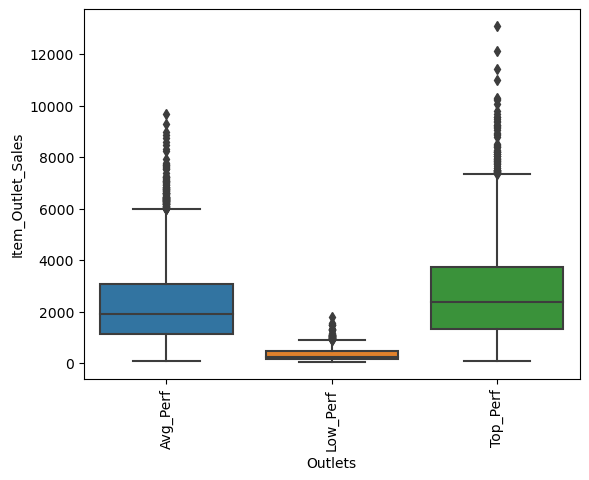

In [79]:
sns.boxplot(data = combined, x='Outlets', 
            y = 'Item_Outlet_Sales')
plt.xticks(rotation = 90)
plt.show()

In [80]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf
3,FDX07,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf
4,NCD19,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf


In [81]:
# Vintage of the Outlet...
combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [82]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14
3,FDX07,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15
4,NCD19,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26


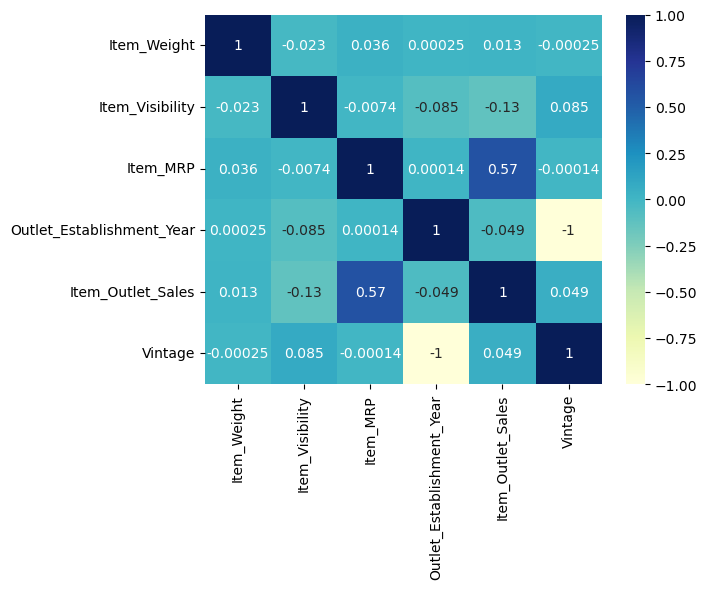

In [83]:
# Correlation plot
sns.heatmap(combined.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [84]:
# Quantity
combined["Price_Per_Unit"] = combined.Item_MRP/combined.Item_Weight
combined["Price_Per_Unit"]

0        26.861204
1         8.153581
2         8.092457
3         9.484115
4         6.031512
           ...    
14199    13.458610
14200    22.255895
14201    11.874400
14202    14.027569
14203     8.399579
Name: Price_Per_Unit, Length: 14204, dtype: float64

<Axes: xlabel='Price_Per_Unit', ylabel='Item_Outlet_Sales'>

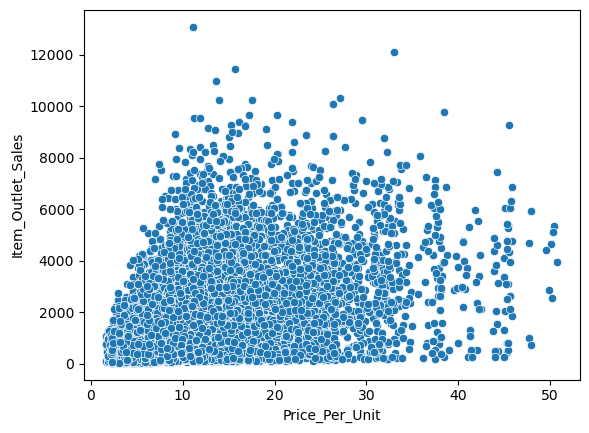

In [85]:
sns.scatterplot(data = combined, x = "Price_Per_Unit", 
                y = "Item_Outlet_Sales")

In [86]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,26.861204
1,DRC01,5.92,Regular,0.019278,Non_Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14,8.092457
3,FDX07,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15,9.484115
4,NCD19,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26,6.031512


In [87]:
# Drop the Unnecessary Columns
combined.drop(["Item_Identifier", "Outlet_Identifier",
              "Outlet_Establishment_Year"], axis = 1, inplace = True)

In [88]:
combined.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_IDS', 'Outlets', 'Vintage',
       'Price_Per_Unit'],
      dtype='object')

In [89]:
pd.set_option('display.max_columns', 50)
pd.get_dummies(combined, drop_first = True).shape

(14204, 21)

### Outliers Analysis

Here at this stage, we will split the data in Train and Test.

``The No of Columns/Features in the Test Set is always n-1 where n is the total no of columns in the Train Set.``

* Train set is the data from where the model will learn the pattern because it has predictors and the target variable.

* Test is the data where we will do the prediction and check the performance of the model...


#### Rule of Identifying the Outliers

* Any value **greater than (Q3 + 1.5 * IQR)** is known as Outlier. This is called **Upper Outlier**

* Similary, Any value **less than (Q1 - 1.5 * IQR)** is known as **Lower Outlier**

In [90]:
# Splitting the Data back in train and test....

train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 13))

In [91]:
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [92]:
combined.loc[0:train.shape[0]-1]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit
0,9.300,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,26.861204
1,5.920,Regular,0.019278,Non_Perishables,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,8.153581
2,17.500,Low Fat,0.016760,Perishables,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14,8.092457
3,19.200,Regular,0.022914,Perishables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15,9.484115
4,8.930,Non_Edible,0.013177,Non_Eateries,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26,6.031512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Non_Perishables,214.5218,High,Tier 3,Supermarket Type1,2778.3834,FD,Top_Perf,26,31.248623
8519,8.380,Regular,0.046982,Non_Perishables,108.1570,Small,Tier 2,Supermarket Type1,549.2850,FD,Avg_Perf,11,12.906563
8520,10.600,Non_Edible,0.035186,Non_Eateries,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,NC,Avg_Perf,9,8.030415
8521,7.210,Regular,0.145221,Non_Perishables,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Avg_Perf,4,14.304189


In [93]:
newtrain.shape, newtest.shape

((8523, 13), (5681, 13))

<Axes: xlabel='Item_Outlet_Sales'>

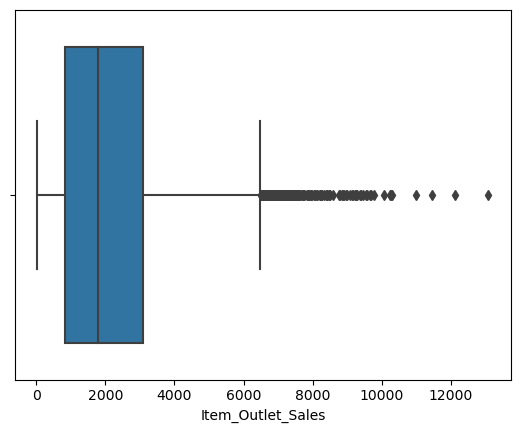

In [94]:
# See the Outlier
sns.boxplot(data = newtrain, x = "Item_Outlet_Sales")

In [95]:
# Lets Frame the Rules
q3 = newtrain.quantile(0.75)
q1 = newtrain.quantile(0.25)

# Inter Quartile Range
IQR = q3 - q1

# Upper Outlier Cut off
upper = q3 + 1.5*IQR

# Lower Outlier Cut off
lower = q1 - 1.5*IQR

In [96]:
# Lets Remove the Outliers from the Train Dataset only....

# .any(axis = 1) represents that the condition should be checked for all
# the rows and wherever the condition is met, it should produce the data...

wt_outliers = newtrain.loc[~((newtrain>upper) | \
                             (newtrain<lower)).any(axis = 1)]

<Axes: xlabel='Item_Outlet_Sales'>

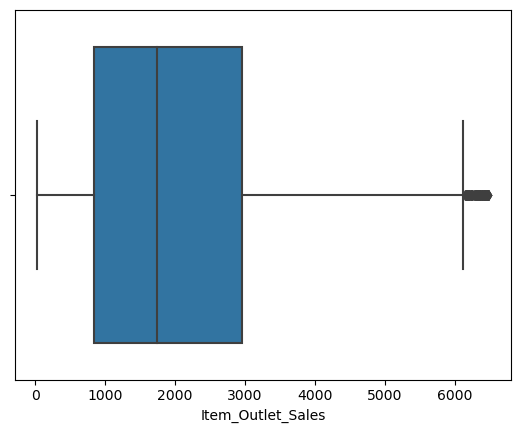

In [97]:
sns.boxplot(data = wt_outliers, x = "Item_Outlet_Sales")

### Scaling post Outliers

In [98]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [99]:
# Applying it in Train and Test Together

nums = ['Item_Weight', 'Item_Visibility', 
        'Item_MRP','Price_Per_Unit']

for i in nums:
    # Scaling the Train Features
    wt_outliers.loc[:, i] = sc.fit_transform(pd.DataFrame\
                                             (wt_outliers.loc[:, i]))    
    # Scale the Test Set Features.
    newtest.loc[:,i] = sc.transform(pd.DataFrame(newtest.loc[:, i]))

In [100]:
wt_outliers.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit
0,-0.846213,Low Fat,-1.147039,Perishables,1.904940,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,2.378215
1,-1.590385,Regular,-1.075117,Non_Perishables,-1.458698,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,-0.537666


In [101]:
# 68% data lies between--1 sigma/1 z score/+- 1 S.D
#95.44 data kies between 2 sigma

In [102]:
# Find the Z score of the target variable
from scipy.stats import zscore


newtrain['Z_scaled']=zscore(newtrain.Item_Outlet_Sales)

In [103]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit,Z_scaled
0,9.30,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Avg_Perf,14,26.861204,0.910601
1,5.92,Regular,0.019278,Non_Perishables,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Avg_Perf,4,8.153581,-1.018440
2,17.50,Low Fat,0.016760,Perishables,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Avg_Perf,14,8.092457,-0.049238
3,19.20,Regular,0.022914,Perishables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Low_Perf,15,9.484115,-0.849103
4,8.93,Non_Edible,0.013177,Non_Eateries,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Top_Perf,26,6.031512,-0.695373


In [104]:
#any value greater than 3 sigma is an outlier

newtrain.loc[np.abs(newtrain.Z_scaled)>3].shape

(90, 14)

In [105]:
#outliers data

newtrain.loc[np.abs(newtrain.Z_scaled)>3].head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_IDS,Outlets,Vintage,Price_Per_Unit,Z_scaled
130,12.000,Low Fat,0.033810,Non_Perishables,180.5976,Medium,Tier 3,Supermarket Type3,7968.2944,FD,Top_Perf,28,15.049800,3.391354
145,18.600,Low Fat,0.039356,Non_Perishables,246.3802,Medium,Tier 1,Supermarket Type1,7370.4060,FD,Avg_Perf,14,13.246247,3.040974
276,16.750,Low Fat,0.081253,Perishables,256.4988,High,Tier 3,Supermarket Type1,7452.9652,FD,Top_Perf,26,15.313361,3.089356
304,9.395,Low Fat,0.159658,Non_Perishables,224.9720,Small,Tier 2,Supermarket Type1,7696.6480,DR,Avg_Perf,11,23.945929,3.232162
333,13.800,Regular,0.056597,Non_Perishables,230.9984,Medium,Tier 3,Supermarket Type3,9267.9360,FD,Top_Perf,28,16.739014,4.152982


In [106]:
#DAta after  removing outliers

newtrain.loc[np.abs(newtrain.Z_scaled)<=3].shape

(8433, 14)

In [107]:
newtrain.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_IDS', 'Outlets', 'Vintage', 'Price_Per_Unit',
       'Z_scaled'],
      dtype='object')

In [108]:
mean_sales=train.groupby('Outlet_Identifier')\
['Item_Outlet_Sales'].mean().to_dict()

In [109]:
train['Outlet_mean_sales']=train.Outlet_Identifier.map(mean_sales)

In [110]:
test['Outlet_mean_sales']=test.Outlet_Identifier.map(mean_sales)

In [111]:
train['Outlet_Sales_std']=train.groupby('Outlet_Identifier')\
['Item_Outlet_Sales'].transform('std')

train['Outlet_Sales_Median']=train.groupby('Outlet_Identifier')\
['Item_Outlet_Sales'].transform('median')

In [112]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_mean_sales,Outlet_Sales_std,Outlet_Sales_Median
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2348.354635,1513.289464,1966.1074
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1995.498739,1375.932889,1655.1788
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2348.354635,1513.289464,1966.1074
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,339.351662,271.014855,250.3408
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2298.995256,1533.531664,2050.6640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,2298.995256,1533.531664,2050.6640
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,2192.384798,1462.399658,1834.9448
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,2438.841866,1538.512533,2109.2544
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,1995.498739,1375.932889,1655.1788


<Axes: >

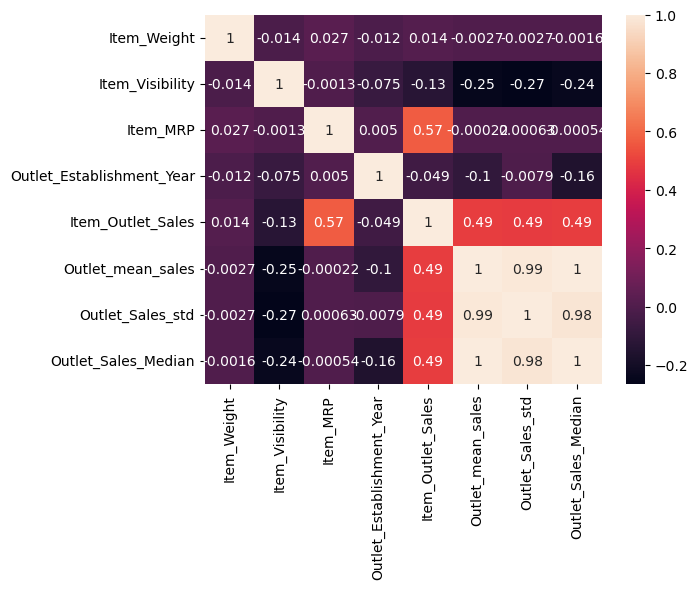

In [113]:
sns.heatmap(train.corr(),annot=True)

In [114]:
wt_outliers.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [115]:
dict_size={'Medium':3,'Small':2,'High':1}

wt_outliers['Outlet_Size']=wt_outliers['Outlet_Size'].map(dict_size)

In [116]:
newtest['Outlet_Size']=newtest['Outlet_Size'].map(dict_size)

In [117]:
train.groupby('Outlet_Size').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_mean_sales,Outlet_Sales_std,Outlet_Sales_Median
Outlet_Size,,,,,,,,
High,13.006148,0.059957,141.425982,1987.000000,2298.995256,2298.995256,1533.531664,2050.664000
Medium,12.895420,0.060142,140.590514,1997.635875,2681.603542,2681.603542,1673.355020,2331.083799
Small,12.848075,0.071383,141.970209,1997.072864,1912.149161,1912.149161,1234.096751,1637.893929


In [118]:
dummytrain=pd.get_dummies(wt_outliers,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)

In [119]:
dummytrain.shape,dummytest.shape

((7881, 20), (5681, 20))

In [120]:
dummytest.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [121]:
dummytest.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Vintage,Price_Per_Unit,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Non_Perishables,Item_Type_Perishables,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_IDS_FD,Item_IDS_NC,Outlets_Low_Perf,Outlets_Top_Perf
8523,1.674725,-1.335864,-0.464110,3,14,-0.998313,0,0,1,0,0,0,1,0,0,1,0,0,0
8524,-1.066383,-0.648838,-0.806956,2,6,-0.168751,0,1,0,1,1,0,1,0,0,1,0,0,0
8525,0.320684,0.712336,1.770498,2,15,0.772371,1,0,0,0,0,1,0,0,0,0,1,1,0
8526,-1.283249,-1.161706,0.323172,2,6,1.494889,0,0,1,0,1,0,1,0,0,1,0,0,0
8527,0.100514,1.135831,1.644928,3,28,0.875915,0,1,0,1,0,1,0,0,1,1,0,0,1


In [122]:
dummytest.shape

(5681, 19)